In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r"C:\Users\singh\Files-main\wine.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [4]:
data.shape

(1599, 13)

In [5]:
#Any missing vaues

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
ord_encoder = OrdinalEncoder(categories = [['Low','Medium','High']])

df1 = ord_encoder.fit_transform(data[['Alcohol_content']])

df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

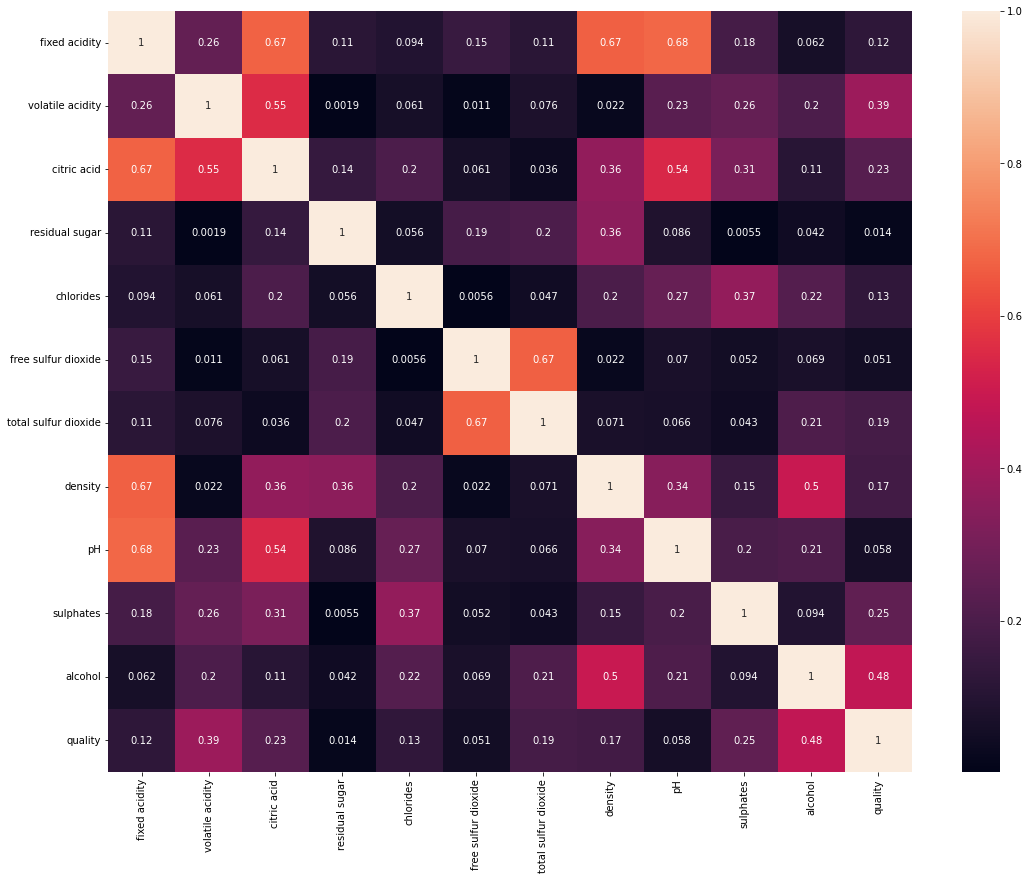

In [8]:
#Ploting heatmap(Correlation matrix)

df_corr = data.corr().abs()
plt.figure(figsize = (18,14))
sns.heatmap(df_corr,annot = True, annot_kws = {"size":10})
plt.show()

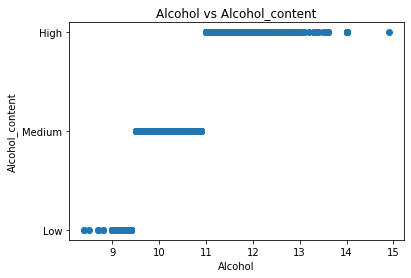

In [9]:
#Make sure they are really correlated (It should follow some trend)

plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol vs Alcohol_content')
plt.show()

In [10]:
#We can see clear trend. As and when Alcohol level is increasing it's content also increasing. So we can delete one of them.

x = data.drop(columns = ['quality','Alcohol_content'])
y = data['quality']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 41)

In [12]:
#Let's first Visualize the on the data without doing any preprocessing

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
#Let's now try to tune some hyperparameters using the GridSearchCV algorithm

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,10),
    'min_samples_split': range(3,10),
    'max_leaf_nodes': range(5,10)
}

In [14]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_param,
                          cv = 5,
                          n_jobs = -1)

In [16]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [17]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [38]:
from sklearn.metrics import classification_report

In [39]:
#Model confidence/Accuracy

#Write one function and call as many as times to check accuracy_score of different models.

def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = clf.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))


In [40]:
#Initiate Decision Tree Classifier with new Parameters and train

clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 3, max_depth = 10, min_samples_leaf = 2, max_leaf_nodes = 7)

In [41]:
#Train the model

clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=3)

In [42]:
#Call the function

metric_score(clf,x_train,x_test,y_train,y_test, train = True)

metric_score(clf,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 58.88%

====================================Test Result================================
Accurancy Score: 54.00%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.54      0.76      0.63       157
           6       0.51      0.43      0.47       168
           7       0.63      0.42      0.51        57
           8       0.00      0.00      0.00         4

    accuracy                           0.54       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.52      0.54      0.52       400



In [52]:
from sklearn.tree import export_graphviz

In [56]:
!pip install graphviz

In [59]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=babaca286f704c551273f0ba73ebd6fe3e47d148e92de3220ac3b64c003107fd
  Stored in directory: c:\users\singh\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [60]:
import pydotplus

#Let's Visualize the final tree

feature_name = list(x.columns)
class_name = list(y_train.unique())

#Create a dot_file which stores the tree structure

dot_data = export_graphviz(clf,rounded = True, filled = True)

#Draw Graph

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_type.png')

#Snow Graph

Image(graph.create_png())

InvocationException: GraphViz's executables not found